### JUPYTER COSAS

In [14]:
if (!require(cluster)){
  install.packages("cluster", repos='http://cran.us.r-project.org')
}
if (!require(purrr)){
  install.packages("purrr", repos='http://cran.us.r-project.org')
}
if (!require(fpc)){
  install.packages("fpc", repos='http://cran.us.r-project.org')
}
if (!require(dbscan)){
  install.packages("dbscan", repos='http://cran.us.r-project.org')
}
if (!require(factoextra)){
  install.packages("factoextra", repos='http://cran.us.r-project.org')
}
if (!require(Matrix)){
  install.packages("Matrix", repos='http://cran.us.r-project.org')
}
if (!require(xtable)){
  install.packages("xtable", repos='http://cran.us.r-project.org')
}
library(cluster)
library(purrr)
library(fpc)
library(dbscan)
library(factoextra)
library(Matrix)
library(xtable)

In [1]:
pokemon <- read.csv("Pokemon.csv", encoding="UTF-8", header=TRUE, sep=",", strip.white=TRUE)[ ,c('Name', 'Total')]
pokemon_fig <- head(pokemon, 10)
pokemon_fig

,Name,Total
,<fct>,<int>
1,Bulbasaur,318
2,Ivysaur,405
3,Venusaur,525
4,VenusaurMega Venusaur,625
5,Charmander,309
6,Charmeleon,405
7,Charizard,534
8,CharizardMega Charizard X,634
9,CharizardMega Charizard Y,634


Warning message in dist(pokemon, method = "euclidian"):
"NAs introducidos por coerción"


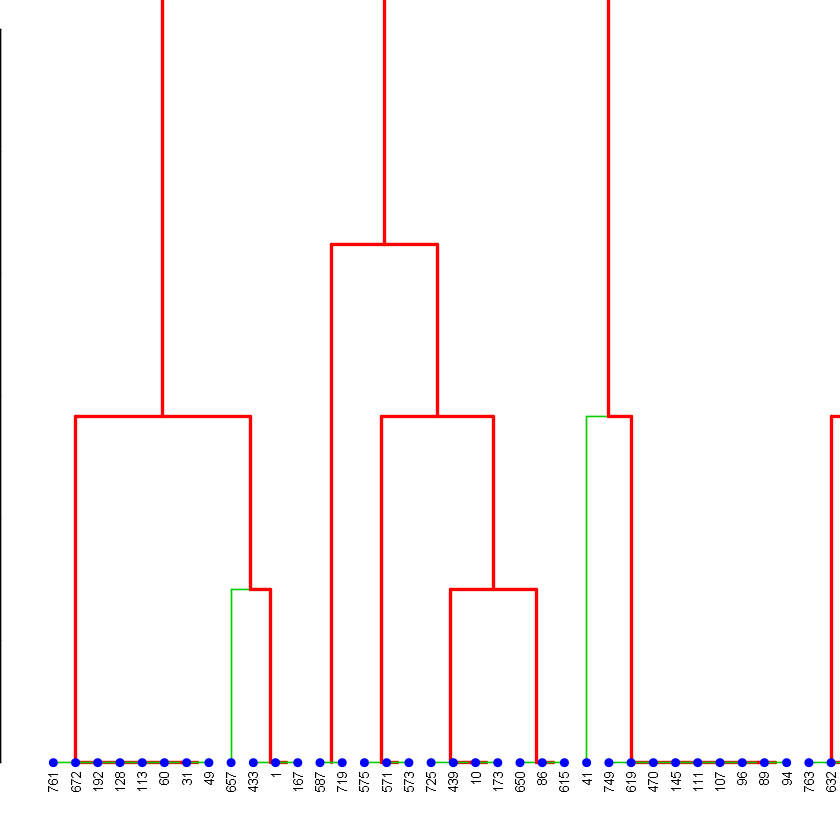

In [22]:
d <- dist(pokemon, method="euclidian")
hc1 <- hclust(d, method="complete")
hc1 <- as.dendrogram(hc1)
par(mar = c(2,0,0,0))
nodePar <- list(lab.cex=0.6, pch=c(NA, 19), cex=0.7, col="blue")
plot(hc1, nodePar=nodePar, edgePar=list(col=2:3, lwd=2:1), labels=NULL, cex=0.6, xlim=c(0,35), ylim=c(0,6))

In [24]:
hc2 <- agnes(d, method="complete")
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")
ac <- function(x) {
    agnes(d,method=x)$ac
}
map_dbl(m, ac)

average    single  complete      ward 
0.9993189 0.9960500 0.9996229 0.9999338

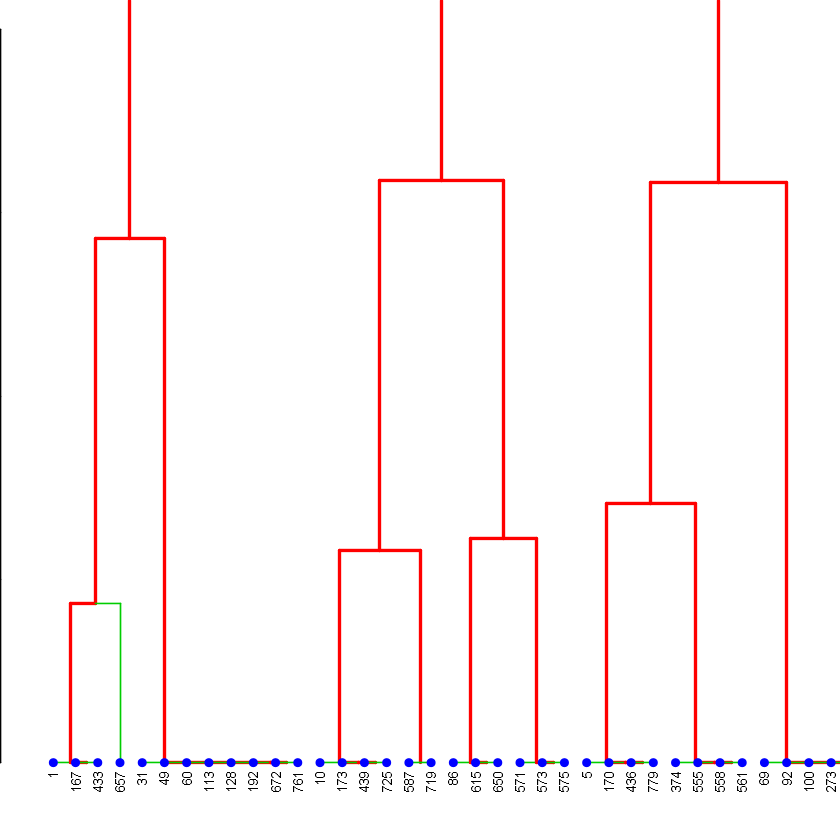

In [27]:
hc3 <- as.dendrogram(agnes(d, method="ward"))
par(mar = c(2,0,0,0))
plot(hc3, nodePar=nodePar ,edgePar=list(col=2:3, lwd=2:1), labels=NULL, cex=0.6, xlim=c(0,35), ylim=c(0,8))

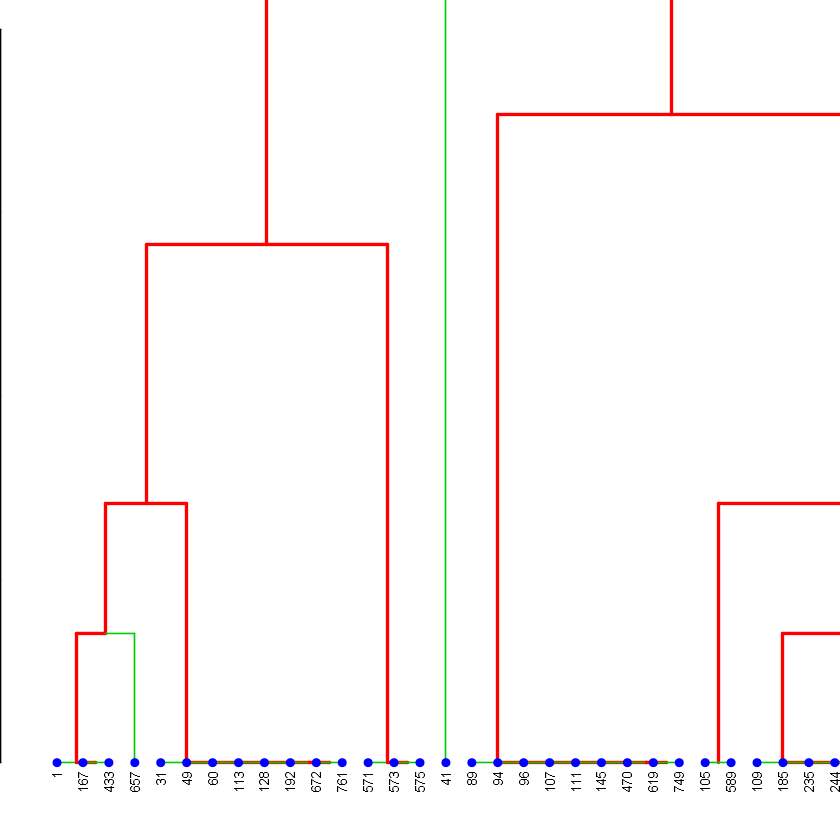

In [28]:
hc4 <- diana(d)
hc4d <- as.dendrogram(hc4)
par(mar = c(2,0,0,0))
plot(hc4d, nodePar=nodePar ,edgePar=list(col=2:3, lwd=2:1), labels=NULL, cex=0.6, xlim=c(0,30), ylim=c(0,8))

Warning message in dist(pokemon, method = "euclidian"):
"NAs introducidos por coerción"


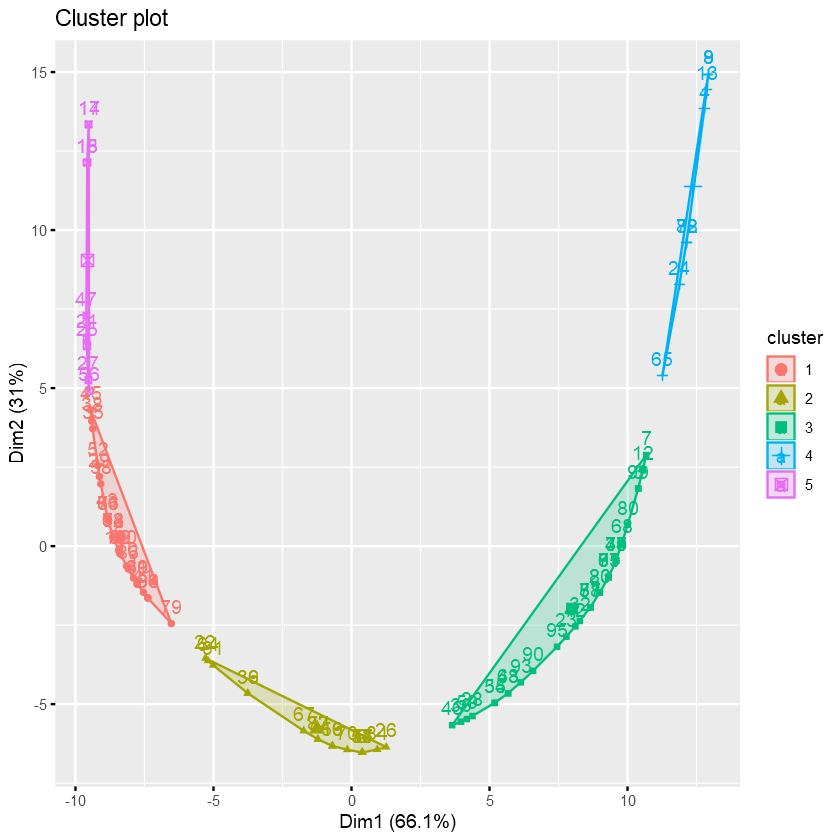

In [32]:
pokemon <- head(pokemon, 100)
d <- dist(pokemon, method="euclidian")
hc4 <- diana(d)
clust <- cutree(hc4, k=5)
fviz_cluster(list(data = d, cluster=clust))